# Yanchep Lagoon Model

First we need to load the IPython libraries:

In [32]:
%pylab inline
%matplotlib inline
import os
import glob
import h5py
import netCDF4
import numpy as np
from scipy import signal
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Running XBeach

To run **XBeach**, we need to go into the folder containing the input file `params.txt`. 

In this first example this is the folder `default`. We use the `!` to tell IPython that we want to execute the code in `bash` mode. Similar to running it from a linux terminal.

In [33]:
!pwd

/workspace/volume/XBeach_model_untouched


In [34]:
!xbeach

  **********************************************************
                     Welcome to XBeach
 
               version 1.22.5135M
               dateThu May 21 10:15:07 UTC 2020
     URL:URL: https://svn.oss.deltares.nl/repos/xbeach/trunk/src/xbeachlibrary
  **********************************************************
 
  Simulation started: YYYYMMDD    hh:mm:ss     time zone (UTC)
                      20200721  04:59:57     +0000
 
    running in:/workspace/volume/XBeach_model_untouched
  General Input Module
  Reading input parameters:
  --------------------------------
  Physical processes:
   XBeach reading fromparams.txt
                    cyclic =0 (no record found, default value used)
                     swave =1 (no record found, default value used)
                single_dir =0 (no record found, default value used)
                     lwave =1 (no record found, default value used)
                      flow =1 (no record found, default value used)
                  sed

# Loading XBeach output

The netcdf file is located in the same location as your input files, we use the IPython netCDF4 functionality to load the data file. Using the `variables.keys()`, we can see all the parameters outputed by XBeach

In [35]:
nc_data = netCDF4.Dataset('xboutput.nc')
#print nc_data.variables.keys()

In [36]:
# Export the wave height
H0 = nc_data.variables['H'][0,:,:]
Hlast = nc_data.variables['H'][-1,:,:]
#H.shape
print('wave range ',H0.min(),H0.max())
print('wave range ',Hlast.min(),Hlast.max())

('wave range ', 0.0, 0.0)
('wave range ', 0.0, 0.0)


In [37]:
nc_data.variables['H']

<type 'netCDF4._netCDF4.Variable'>
float64 H(globaltime, globaly, globalx)
    coordinates: globalx globaly
    units: m
    long_name: Hrms wave height based on instantaneous wave energy
unlimited dimensions: globaltime
current shape = (300, 140, 266)
filling off

In [42]:
nc_data = netCDF4.Dataset('xboutput.nc')
print nc_data.variables.keys()

[u'parameter', u'globalx', u'globaly', u'globaltime', u'zb', u'zs', u'u', u'v', u'H', u'Fx', u'Fy', u'ceqsg', u'ccg', u'Susg', u'Svsg', u'sedero', u'dzav', u'E', u'D', u'breaking', u'cf', u'pointtime', u'pointx', u'pointy', u'station_id', u'xpointindex', u'ypointindex', u'pointtypes', u'point_zs', u'point_H', u'point_u', u'point_v', u'point_Fx', u'point_Fy', u'point_E', u'point_D', u'meantime', u'u_mean', u'u_var', u'u_min', u'u_max']


In [44]:
xx = nc_data.variables['pointx'][:]
xmin = nc_data.variables['pointx'][:][0]
xmax = nc_data.variables['pointx'][:][50]
print(H_spurs.shape)

(50,)


In [48]:
# Export the stored time values
time = nc_data.variables['globaltime'][:]
# Export the X-axis values of the profile
x = nc_data.variables['globalx'][:,:]
# Export the X-axis values of the profile
y = nc_data.variables['globaly'][:,:]
# Export the bed elevation
zb = nc_data.variables['zb'][:,:,:]
# Export the wave height
H = nc_data.variables['H'][:,:,:]
# Export the water level
zs = nc_data.variables['zs'][:,:,:]
# Export sedimentation/erosion
sedero = nc_data.variables['sedero'][:,:,:]
# Export total bed level change due to avalanching
dzav = nc_data.variables['dzav'][:,:,:]
# Export x-axis velocity
u = nc_data.variables['u'][:,:,:]
# Export y-axis velocity
v = nc_data.variables['v'][:,:,:]
# Export x-axis wave force
Fx = nc_data.variables['Fx'][:,:,:]
# Export y-axis wave force
Fy = nc_data.variables['Fy'][:,:,:]


In [52]:
# Export breaking
breaking = nc_data.variables['breaking'][:,:,:]
print breaking

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]


In [53]:
print('wave range ',H.min(),H.max())

('wave range ', 0.0, 0.0)


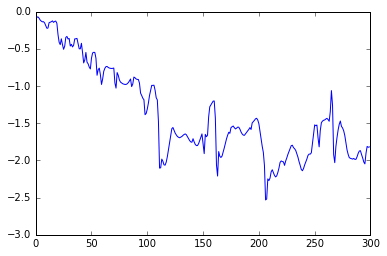

In [54]:
min_zs=[]
for i in range (0,len(time)):
    min_zs.append(np.min(zs[i,:,:80]))
plot(time,min_zs)


Find the grid resolution

In [55]:
diffx = np.diff(x,axis=1)
diffy = np.diff(y,axis=1)
dx = np.sqrt(diffx.min()**2+diffy.min()**2)
print 'Model resolution (m):',dx

Model resolution (m): 5.0


# Create the hdf5 files for Paraview
First we set the folder name that will be used to store the file

In [26]:
outDir = 'output'

if os.path.exists(outDir):
    outDir += '_'+str(len(glob.glob(outDir+str('*')))-1)
os.makedirs(outDir)

print 'data will be stored in the following folder: ',outDir

data will be stored in the following folder:  output


In [27]:
for step in range(len(time)-1):
    print 'Performing step:',step,'out of:',len(time)-1
    f1 = interpolate.interp2d(xi, yi, zb[step,:,:], kind='cubic')
    znew = f1(xnew, ynew)
    f2 = interpolate.interp2d(xi, yi, H[step,:,:]+zs[step,:,:], kind='cubic')
    Hnew = f2(xnew, ynew)
    f3 = interpolate.interp2d(xi, yi, sedero[step,:,:], kind='cubic')
    sederonew = f3(xnew, ynew)
    f4 = interpolate.interp2d(xi, yi, dzav[step,:,:], kind='cubic')
    dzavnew = f4(xnew, ynew)
    f5 = interpolate.interp2d(xi, yi, u[step,:,:], kind='cubic')
    unew = f5(xnew, ynew)
    f6 = interpolate.interp2d(xi, yi, v[step,:,:], kind='cubic')
    vnew = f6(xnew, ynew)
    f7 = interpolate.interp2d(xi, yi, Fx[step,:,:], kind='cubic')
    Fxnew = f7(xnew, ynew)
    f8 = interpolate.interp2d(xi, yi, Fy[step,:,:], kind='cubic')
    Fynew = f8(xnew, ynew)
    
    h5file = str(outDir)+'/data'+str(step)+'.hdf5'
    h5ff = 'data'+str(step)+'.hdf5'
    with h5py.File(h5file, "w") as f:
        f.create_dataset('zb',shape=(znew.shape), dtype='float32', compression='gzip')
        f["zb"][:,:] = znew
        f.create_dataset('H',shape=(Hnew.shape), dtype='float32', compression='gzip')
        f["H"][:,:] = Hnew
        f.create_dataset('sedero',shape=(sederonew.shape), dtype='float32', compression='gzip')
        f["sedero"][:,:] = sederonew
        f.create_dataset('dzav',shape=(dzavnew.shape), dtype='float32', compression='gzip')
        f["dzav"][:,:] = dzavnew
        f.create_dataset('u',shape=(unew.shape), dtype='float32', compression='gzip')
        f["u"][:,:] = unew
        f.create_dataset('v',shape=(vnew.shape), dtype='float32', compression='gzip')
        f["v"][:,:] = vnew
        f.create_dataset('Fx',shape=(Fxnew.shape), dtype='float32', compression='gzip')
        f["Fx"][:,:] = Fxnew
        f.create_dataset('Fy',shape=(Fynew.shape), dtype='float32', compression='gzip')
        f["Fy"][:,:] = Fynew
        
    xmf_file = str(outDir)+'/bed'+str(step)+'.xmf'
    f= open(str(xmf_file),'w')
    f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    f.write('<!DOCTYPE Xdmf SYSTEM "Xdmf.dtd">\n')
    f.write('<Xdmf Version="2.0" xmlns:xi="http://www.w3.org/2001/XInclude">\n')
    f.write(' <Domain>\n')
    f.write('    <Grid GridType="Collection" CollectionType="Spatial">\n')
    f.write('      <Time Type="Single" Value="%s"/>\n'%time[step])
    f.write('      <Grid Name="Block.0" GridType="Uniform">\n')
    f.write('         <Topology Type="2DCoRectMesh" NumberOfElements=')
    f.write('"%d %d"/>\n'%(znew.shape[0],znew.shape[1]))
    f.write('         <Geometry Type="ORIGIN_DXDY">\n')
    f.write('          <DataItem NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d">0. 0.</DataItem>\n'%2)
    f.write('          <DataItem NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d">10. 10.</DataItem>\n'%2)
    f.write('         </Geometry>\n')

    f.write('         <Attribute Type="Scalar" Center="Node" Name="zb [m]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/zb</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')

    f.write('         <Attribute Type="Scalar" Center="Node" Name="sedero [m]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/sedero</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('         <Attribute Type="Scalar" Center="Node" Name="dzav [m]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/dzav</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('      </Grid>\n')
    f.write('    </Grid>\n')
    f.write(' </Domain>\n')
    f.write('</Xdmf>\n')
    f.close()
    
    
    xmf_file = str(outDir)+'/sea'+str(step)+'.xmf'
    f= open(str(xmf_file),'w')
    f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    f.write('<!DOCTYPE Xdmf SYSTEM "Xdmf.dtd">\n')
    f.write('<Xdmf Version="2.0" xmlns:xi="http://www.w3.org/2001/XInclude">\n')
    f.write(' <Domain>\n')
    f.write('    <Grid GridType="Collection" CollectionType="Spatial">\n')
    f.write('      <Time Type="Single" Value="%s"/>\n'%time[step])
    f.write('      <Grid Name="Block.0" GridType="Uniform">\n')
    f.write('         <Topology Type="2DCoRectMesh" NumberOfElements=')
    f.write('"%d %d"/>\n'%(znew.shape[0],znew.shape[1]))
    f.write('         <Geometry Type="ORIGIN_DXDY">\n')
    f.write('          <DataItem NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d">0. 0.</DataItem>\n'%2)
    f.write('          <DataItem NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d">10. 10.</DataItem>\n'%2)
    f.write('         </Geometry>\n')

    f.write('         <Attribute Type="Scalar" Center="Node" Name="H+zs [m]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/H</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('         <Attribute Type="Scalar" Center="Node" Name="u [m/s]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/u</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('         <Attribute Type="Scalar" Center="Node" Name="v [m/s]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/v</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('         <Attribute Type="Scalar" Center="Node" Name="Fx [N/m2]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/Fx</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('         <Attribute Type="Scalar" Center="Node" Name="Fy [N/m2]">\n')
    f.write('          <DataItem Format="HDF" NumberType="Float" Precision="4" ')
    f.write('Dimensions="%d %d">%s:/Fy</DataItem>\n'%(len(ynew),len(xnew),h5ff))
    f.write('         </Attribute>\n')
    
    f.write('      </Grid>\n')
    f.write('    </Grid>\n')
    f.write(' </Domain>\n')
    f.write('</Xdmf>\n')
    f.close()
    
xdmf_file = str(outDir)+'/bedSeries.xdmf'
f= open(str(xdmf_file),'w')

f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
f.write('<!DOCTYPE Xdmf SYSTEM "Xdmf.dtd">\n')
f.write('<Xdmf Version="2.0" xmlns:xi="http://www.w3.org/2001/XInclude">\n')
f.write(' <Domain>\n')
f.write('    <Grid GridType="Collection" CollectionType="Temporal">\n')

for step in range(len(time)-1):
    xfile = 'bed'+str(step)+'.xmf'
    f.write('      <xi:include href="%s" xpointer="xpointer(//Xdmf/Domain/Grid)"/>\n' %xfile)

f.write('    </Grid>\n')
f.write(' </Domain>\n')
f.write('</Xdmf>\n')
f.close()

xdmf_file = str(outDir)+'/seaSeries.xdmf'
f= open(str(xdmf_file),'w')

f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
f.write('<!DOCTYPE Xdmf SYSTEM "Xdmf.dtd">\n')
f.write('<Xdmf Version="2.0" xmlns:xi="http://www.w3.org/2001/XInclude">\n')
f.write(' <Domain>\n')
f.write('    <Grid GridType="Collection" CollectionType="Temporal">\n')

for step in range(len(time)-1):
    xfile = 'sea'+str(step)+'.xmf'
    f.write('      <xi:include href="%s" xpointer="xpointer(//Xdmf/Domain/Grid)"/>\n' %xfile)

f.write('    </Grid>\n')
f.write(' </Domain>\n')
f.write('</Xdmf>\n')
f.close()

Performing step: 0 out of: 299
Performing step: 1 out of: 299
Performing step: 2 out of: 299
Performing step: 3 out of: 299
Performing step: 4 out of: 299
Performing step: 5 out of: 299
Performing step: 6 out of: 299
Performing step: 7 out of: 299
Performing step: 8 out of: 299
Performing step: 9 out of: 299
Performing step: 10 out of: 299
Performing step: 11 out of: 299
Performing step: 12 out of: 299
Performing step: 13 out of: 299
Performing step: 14 out of: 299
Performing step: 15 out of: 299
Performing step: 16 out of: 299
Performing step: 17 out of: 299
Performing step: 18 out of: 299
Performing step: 19 out of: 299
Performing step: 20 out of: 299
Performing step: 21 out of: 299
Performing step: 22 out of: 299
Performing step: 23 out of: 299
Performing step: 24 out of: 299
Performing step: 25 out of: 299
Performing step: 26 out of: 299
Performing step: 27 out of: 299
Performing step: 28 out of: 299
Performing step: 29 out of: 299
Performing step: 30 out of: 299
Performing step: 3

In [29]:
!cp -rf output /workspace/volume/